# Introduction to machine learning & Data Analysis

Basic introduction on how to perform typical machine learning tasks with Python.

Prepared by Mykhailo Vladymyrov & Aris Marcolongo,
Data Science Lab, University Of Bern, 2022

This work is licensed under <a href="https://creativecommons.org/share-your-work/public-domain/cc0/">CC0</a>.

# Part 1.

In [ ]:
#%pip install scipy=='1.7.1'


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.mixture import GaussianMixture

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from matplotlib import  pyplot as plt
import numpy as np
import pandas as pd
from imageio import imread
from time import time as timer
import os
import tarfile

import tensorflow as tf

%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

from scipy.stats import entropy


In [ ]:
if not os.path.exists('data'):
    path = os.path.abspath('.')+'/colab_material.tgz'
    tf.keras.utils.get_file(path, 'https://github.com/neworldemancer/DSF5/raw/master/colab_material.tgz')
    tar = tarfile.open(path, "r:gz")
    tar.extractall()
    tar.close()

In [ ]:
from utils.routines import *

# 1. Clustering

## 1. K-Means

### Theory overview.

**Objective:** 

Clustering techniques divide the set of data into group of atoms having common features. Each data point $p$ gets assigned a label $l_p \in \{1,..,K\}$. In this presentation the data points are supposed to have $D$ features, i.e. each data point belongs to $\mathbf{R}^D$.

**Domains:** 

- `Cluster centers`. Each cluster center belongs to $\mathbf{R}^D$. It belongs therefore to the same input space of the datacloud. All combined the cluster centers belong to $\mathbf{R}^{D \times N_{clust}}$ and can be saved in a matrix of dimension $D \times N_{clust}$


- `Label assignement`. Each point must be assigned to a label. Given an ordering of the points, a cluster 
assignement can be represented therefore by a sequence $\{l_1,...,l_{N_{points}}\}$. Formally a label assigenemt belongs to $\{0,...,N_{clust}-1\}^{N_{points}}.$


**Methods:** 
- We call $P_k$ the subset of the data set which gets assigned to class $k \in \{0,...,N_{clust}-1\}$ . 
K-means aims at minimizing the objective function among all possible label assignments and all possible cluster centers $\{\mathbf{c}_k\}_{k=1,..,N_k}$:

$$L(\text{class_assigment}, \{\mathbf{c}_k\}) = \sum_k L_k (\text{class_assigment}, \{\mathbf{c}_k\})$$
$$L_k= \sum_{p \in P_k} d(\mathbf{x}_p,\mathbf{c}_{k})^2$$

where d is the metric function suited of the problem of interest. Here we use the Euclidean distance as a metric :

$$d(\mathbf{x}_p,\mathbf{c}_{k})=|\mathbf{x}_p-\mathbf{c}_{k}| \quad \quad $$


We proceed using a simple technique called "coordinate descent", in which we fix one coordinate and optimize the other. Than we iterate. To do this we have to answer two questions:

QUESTION 1: Given some cluster centers, what is the optimal class assignement ?

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/Assignments_1.png" width="100%"/>

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/Assignments_2.png" width="100%"/>

ANSWER 1: Each point has to be assigned to the closest cluster center.

QUESTION 2: Given a fixed label assignment, what are the optimal cluster centers ?

ANSWER 2: If we fix a class_assigment, the optimal $\mathbf{c}_{k}$ are the centroids given by the expression:
$$\mathbf{c}_k=\frac{1}{N_k}\sum_{p \in P_k} \mathbf{x_p}$$

where $N_k$ is the number of points belonging to cluster $k$ ( magnitude of subset $P_k$)

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/iterations.png" width="100%"/>

Such an algorithm finds local minima and may need to be started several times with different initializations.

**Terminology and output of a K-means computation:**
- *Within-cluster variation* : $L_k$ is called within cluster variation. 

- *Silhouette score*: K-means clustering fixes the number of clusters a priori. Some technique must be chosen to score the different optimal clusterings for different $k$. One technique chooses the best *Silouhette score*. Intuitively, this evaluates the typical distance of points within a same clusters and compares it against the typical distance of points belonging to neighboring but different clusters ( https://en.wikipedia.org/wiki/Silhouette_(clustering) ).

### EXERCISE 1: Implement K-Means

In [ ]:
# The following functions, when completed, provide a naive implementation of K-Means.
# Insert your code between the lines # BEGIN OF YOUR CODE // # END OF YOUR CODE
# Execute next shell to test your implementation

def get_updated_centers( points, current_class_assignment, nclust ):
    '''
    Input:   
    - points : the datacloud, of shape (npoints,ndims)
    - current_class_assignmet : an array of shape (npoints) with values in [0,...,nclust-1]
    - nclust:  the number of clusters considered
    Returns: 
    - centers : an array of shape (nclust, ndims) containing the updated cluster centers
    '''
    npoints, ndims = points.shape
    # BEGIN OF YOUR CODE
    # Initialize the updated cluster centers with zeros
    # ...
    # END OF YOUR CODE
    maps=[]
    for clust in range(nclust):
        maps.append(current_class_assignment==clust)
    # BEGIN OF YOUR CODE
    # With "points[maps[clust]]" you can access all data points that are currently
    # assigned to cluster clust. Use it to initialize centers[clust]
    # ...
    # END OF YOUR CODE
    
    return centers 


def get_upated_class_assignment(points, current_centers, nclust ):
    '''
    Input:   
    - points : the datacloud, of shape (npoints,ndims)
    - current_centers : an array of shape (nclust,ndims) containing the cluster centers at present iteration
    - nclust:  the number of clusters considered
    Returns: 
    - centers :  an array of shape (npoints) with values in [0,...,nclust-1] with the updated class assignements
    '''
    npoints, ndims = points.shape
    # BEGIN OF YOUR CODE 
    # Initialize the class_assignment vector as an array of zeros
    # ...
    # END OF YOUR CODE
    for ip in range(npoints):
        # BEGIN OF YOUR CODE 
        # Create a list of all distances from the current point ( with position points[ip,:] and the cluster centers )
        # ...
        # END OF YOUR CODE
        class_assignment[ip]=np.argmin(np.array(distances))   
    return class_assignment


def KNN_iterator( points, get_updated_centers, get_upated_class_assignment, nclust, n_iter, seed=42 ):
    '''
    Input:   
    - points : the datacloud, of shape (npoints,ndims)
    - get_updated_centers, get_upated_class_assignment : The functions you developed in the previous part
    - n_clust : the number of clusters considered
    - n_iter : the number of iterations
    Returns: 
    - traj :  a list on length n_iter . traj[i] is an array of shape (nclust,ndims) giving the cluster center 
    positions
    '''
    npoints, ndims = points.shape
    np.random.seed(seed)
    centers=np.random.uniform(low=-20.0, high=20.0, size=(nclust,ndims))
    traj=[]
    traj.append(centers)
    # BEGIN OF YOUR CODE . 
    # Perform the loop over iterations n_iter, calling each time first get_upated_class_assignment and
    # than get_updated_centers. Append the centers in the list traj
    # ...
    # END OF YOUR CODE
    return traj


def plot_traj(traj):
    n_iter=len(traj)
    nclust, ndims=traj[0].shape
    if ndims != 2 :
        print('Today we just visualize dim =2')
        return
    else :
        colors=['red','green','yellow']
        for ic in range(nclust):
            for it in np.arange(n_iter-1):
                plt.plot([traj[it][ic,0],traj[it+1][ic,0]],
                         [traj[it][ic,1],traj[it+1][ic,1]],'-o', color=colors[ic])  
    return


In [ ]:
# Execute these lines to test your code and see the evolution of the cluster_centers

plt.figure(figsize=(10,10))
points=km_load_th1()
traj=KNN_iterator(points, get_updated_centers, get_upated_class_assignment, nclust=3,n_iter=100, seed=66 )
plt.plot(points[:,0],points[:,1],'o')
plot_traj(traj)
plt.plot(traj[-1][:,0],traj[-1][:,1],'o',markersize=5, color='k')

### Sklearn: implementation and usage of K-means.

We start with a 2D example that can be visualized.

First we load the data-set.

In [ ]:
points=km_load_th1()

Explore the data-set checking the dataset dimensionality.

In [ ]:
print(points.shape)
print('We have ', points.shape[0], 'points with two features')

In [ ]:
plt.plot(points[:,0],points[:,1],'o')
plt.xlabel('feature-1')
plt.ylabel('feature-2')
plt.show()

It looks visually that the data set has three clusters. We will cluster them using K-means. As usual, we create a KMeans object. Note that we do not need to initialize it with a data-set.

In [ ]:
clusterer = KMeans(n_clusters=3, random_state=10)

A call to the fit method computes the cluster centers which can be plotted alongside the data-set. They are accessible from the cluster_centers_ attribute:

In [ ]:
clusterer.fit(points)
plt.plot(points[:,0],points[:,1],'o')
plt.plot(clusterer.cluster_centers_[:,0],clusterer.cluster_centers_[:,1],'o',markersize=10)
plt.show()

In [ ]:
clusterer.cluster_centers_[:,:]

The predict method assigns a new point to the nearest cluster. We can use predict with the training dataset and color the data-set according to the cluster label.

In [ ]:
cluster_labels=clusterer.predict(points)
plt.scatter(points[:,0],points[:,1],c=cluster_labels)
plt.show()

Finally, we can try to vary the number of clusters and score them with the Silhouette score.

In [ ]:
sil=[]

for iclust in range(2,6):
    clusterer = KMeans(n_clusters=iclust, random_state=10)
    cluster_labels = clusterer.fit_predict(points)
    score=silhouette_score(points,cluster_labels)
    sil.append(score)
    plt.scatter(points[:,0],points[:,1],c=cluster_labels)
    plt.show()
    
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.plot(np.arange(len(sil))+2, sil,'-o')
plt.show()

The same techniques can be used on high dimensional data-sets. We use here the famous MNIST dataset for integer digits, that we are downloading from tensorflow.

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()

X=train_images[:5000,:].reshape(5000,-1)

In [ ]:
print(X.shape)
image=X[1232,:].reshape(28,28)
plt.imshow(image)

We can cluster the images exactly as we did for the 2d dataset.

In [ ]:
clusterer = KMeans(n_clusters=10, random_state=10)
cluster_labels = clusterer.fit_predict(X)

We can plot the cluster centers (which are 2D figures!) to see if the clustering is learning correct patterns! 

In [ ]:
for iclust in range(10):
    plt.imshow(clusterer.cluster_centers_[iclust].reshape(28,28))
    plt.show()

You can see that the model looks to assign one class to the same good. Nevertheless, using the cluster centers and with a further trick, in exercise 2 you will build a digit recognition model !

### EXERCISE 2: Discover the number of Gaussians

In [ ]:
### In this exercise you are given the dataset points, consisting of high-dimensional data. It was built taking random 
# samples from a number k of multimensional gaussians. The data is therefore made of k clusters but, being 
# very high dimensional, you cannot visualize it. Your task it to use K-means combined with the Silouhette 
# score to find the number of k.

# 1. Load the data using the function points=load_ex1_data_clust() , check the dimensionality of the data.
points= load_ex1_data_clust()
npoints, ndims = points.shape
print(npoints,ndims)
points

# 2. Fix the number of clusters k and define a KMeans clusterer object. Perform the fitting and compute the Silhouette score. 
# Save the results on a list. 
res=[] 
for n_clusters in range(2,20) :
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(points)
    score=silhouette_score(points,cluster_labels)
    res.append(score)
    
# 3. Plot the Silhouette scores as a function ok k? What is the number of clusters ?
plt.plot(np.arange(len(res))+2,res,'-o')
plt.xticks(np.arange(2, 20, step=1))
plt.grid(b=None, which='major', axis='x')
plt.show()

# 4. Optional. Check the result that you found via umap. Remember the syntax umap_model=umap.UMAP(random_state=xxx) to 
# istantiate the umap model and than use fit_transform to compute the coordinate with the reduced dimensionality. 

In [42]:
import umap

/Users/jonasbuechi/Dropbox/Uni/CASADS22/git/CAS-Applied-Data-Science/.venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


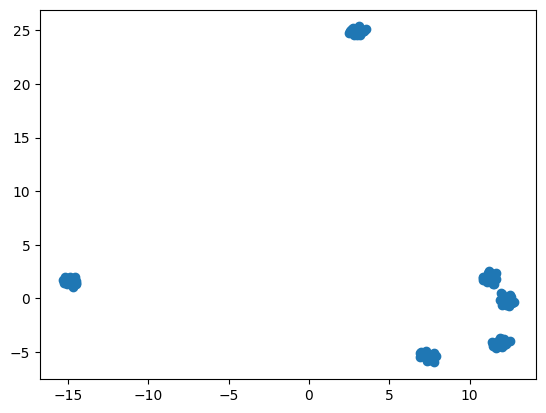

In [46]:
umap_model = umap.UMAP(n_neighbors=100, n_components=2, random_state=1711)

umap_hart = umap_model.fit_transform(points)
plt.scatter(umap_hart[:, 0], umap_hart[:, 1])
plt.show()

### EXERCISE 3: Predict the garment using K-Means

###### DESCRIPTION ###############

In this exercise you are asked to use the clustering performed by K-means to predict the good in the F-mnist dataset. We show here how clustering can be used as a preprocessing tool for a supervised task !

We will follow the pipeline to fit the model :

1- We perform K-means clustering using just the input data and fixing for the start the number of clusters to 10 ;

2- To each cluster, we will attach a label, finding the most represented good inside that cluster. Let's call that label
 assignment[c] for cluster c ;  
 
When using the model for prediction of a new image we will :

1- Find the cluster center nearest to the new image ;

2- Assign the new image to the good most represented in that cluster

In [82]:
from enum import unique


fmnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()

X_train=train_images[:5000,:].reshape(5000,-1)
y_train=train_labels[:5000]
X_test=test_images[:1000,:].reshape(1000,-1)
y_test=test_labels[:1000]

clusterer = ...
clusterer.fit(...)

clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(points)


In [ ]:
# Follow the following STEPS to solve the exercise

# STEP 1. Load the dataset and reshape it accordingly.
fmnist = ...
(train_images, train_labels), (test_images, test_labels) = ...
X_train=train_images[:5000,:].reshape(...,...)
y_train=train_labels[:5000]
X_test=test_images[:1000,:].reshape(...,...)
y_test=test_labels[:1000]


# STEP 2. 
# Define the cluster KMeans object and fit the model on the training set. 
clusterer = ...
clusterer.fit(...)

# STEP 3. 
# Compute the cluster labels. 
cluster_labels=...

# STEP 4. 
# Compute the assignment list. assignment[i] will be the majority class of the i-cluster  
# You can use, if you want,  the function most_common with arguments (k,y_train, cluster_labels) 
# this compute the assignment list. Print the assignment list to explore its values.

def most_common(nclusters, supervised_labels, cluster_labels):
    """
    Args:
    - nclusters : the number of clusters
    - supervised_labels : for each garment, the labelling provided by the training data ( e.g. in y_train or y_test)
    - cluster_labels : for each garment, the cluster it was assigned by K-Means using the predict method of the Kmeans object
    
    Returns:
    - a list "assignment" of lengths nclusters, where assignment[i] is the majority class of the i-cluster 
    """
    assignment=[]
    for icluster in range(nclusters):
        indices=list(supervised_labels[cluster_labels==icluster])
        try:
            chosen= max(set(indices), key=indices.count)
        except ValueError :
            print('Em')
            chosen=1
        assignment.append(chosen)
    return assignment
assignment=...

# STEP 5. 
# Predict the cluster labels for the test set 
cluster_labels_test=...

# STEP 6.
# using the cluster labels predicted in STEP 5 and the previously computed assignment[] list, 
# predict what are according to your model the predicted goods for the test set, call them new_labels
# (The Python notation suggested is called list_comprehension)
new_labels = [assignment[...] for ... in ... ]

# STEP 7.
# Using  a call cm=metrics.confusion_matrix( y_test, new_labels ) you can print the confusion matrix on the test set, 
# which
# provides information on the quality of the fit. Print the percentage of correctly classified examples. 
# For example, you can divide the sum of the elements on the diagonal of cm (save it in denominator "den") 
# and divide by the sum of all entries of cm (save it in numerator "num").  
cm= ...
print(cm)
num=...
den=...
accuracy=num/den
print(num/den)

#  Perform again steps 2 / 7 increasing the number of clusters from 10 to 40 what happens to the performance ? 
for iclust in ... :
    print(f'Test set with {iclust} clusters')
    # BEGIN OF YOUR CODE . 
    # ...
    # END OF YOUR CODE
    print(assignment)
    print(accuracy)
    print(cm)
    return traj

## 2. Dendograms 

**Objective:** 

In hierarchical clustering we do not have only an optimal set of clusters, but for each different "length scale" we have a different set of clusters.

**Algorithm:** 

- We start with a length scale $l=0$ at the beginning and consider all sample elements as different clusters.

- We increase than $l$ to values larger than zero. Let's call the minimum distance between pair of points $l_0$. As soon as we reach $l=l_0$, these elements are merged into a new cluster (greedy strategy). 

To proceed further we need to define a distance between subsets $S_1,S_2$ of points. In the "single linkage" flavour we define:

$$d(S_1,S_2)=min_{a\in S_1, b\in S_2} d(a,b)$$

- This way we can proceed increasing $l>l_0$. As soon as we find two clusters with distance smaller than $l_1>l_0$, we merge them. 

- We keep on increasing $l$ as far as one one cluster remains

The result of this clustering procedure can be summarized in a `dendrogram`

In [84]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster import hierarchy
from ipywidgets import interact
from scipy.cluster.hierarchy import fcluster

points=km_load_th1()
Z = hierarchy.linkage(points, 'single')
n_clusters=int(np.max(Z[:,[0,1]].flatten()))
print(n_clusters)

@interact
def plot(t=(0,7,0.1)):  
    fig, axes=plt.subplots(1,2,figsize=(15,10), gridspec_kw={'width_ratios': [1, 2]})
    fl = fcluster(Z,t=t,criterion='distance')
    maps={}
    for clust in range(n_clusters):
        maps[clust]=(fl==clust)
    c=0
    for clust in range(n_clusters):
        if np.sum(maps[clust])>0:
            c+=1
    plt.figure(figsize=(19,5))
    d = hierarchy.dendrogram(Z,ax=axes[1], color_threshold=t)
    axes[1].axhline(t,linestyle='--',color='red')
    axes[1].set_ylabel('Cluster distance')
    axes[1].axes.get_xaxis().set_visible(False)
    axes[1].set_xlabel('Points')
    axes[1].set_title(f'Number clusters: {c}')
    axes[0].scatter(points[d['leaves'],0],points[d['leaves'],1], color=d['leaves_color_list'])


237


interactive(children=(FloatSlider(value=3.0, description='t', max=7.0), Output()), _dom_classes=('widget-inter…

**Properties:** 

If we fix a certain cutoff length $l_c$, the clusters identified $C_1,...,C_n$ at that length are such that : 

1- The constintute a disjoint partition of the whole dataset, i.e. they are mutually non intersecting aand each point belongs to a cluster 

2- The distance between two clusters $d(C_1,C_j)$ is larger than $l_c$ for each $i,j$. 

( Check of point 2: If it was smaller, take $A,B$ such that $d(A,B)=d(C_1,C_j)=l'<l_c$ and $A \in C_1$, $B \in C_2$. But than, when merging clusters at length scale $l'$ the clusters at which $A,B$ belonged to, would have been merged. By construction, after two points are merged into the same cluster at a length scale, they belong to the same cluster at all larger length scales. This is a contradiction. )

## 3. Gaussian mixtures

### Theory overview.

K-Means is a modelling procedure which is biased towards clusters of circular shape and therefore does not always work perfectly, as the following examples show:

In [ ]:
points=gm_load_th1()
clusterer = KMeans(n_clusters=3, random_state=10)
cluster_labels=clusterer.fit_predict(points)
plt.figure(figsize=(5,5))
plt.gca().set_aspect('equal')
plt.title('K-Means')
plt.xlim(-6,6)
plt.scatter(points[:,0],points[:,1],c=cluster_labels, s=2)
plt.show()

In [ ]:
points=gm_load_th2()
clusterer = KMeans(n_clusters=2, random_state=10)
cluster_labels=clusterer.fit_predict(points)
plt.figure(figsize=(5,5))
plt.title('K-Means')
plt.scatter(points[:,0],points[:,1],c=cluster_labels, s=2)

A Gaussian mixture model is able to fit these kinds of clusters. In a Gaussian mixture model, each data-set is supposed to be a random point from the distribution:
$$f(\mathbf{x})=\sum_c \pi_c N(\mathbf{\mu_c},\mathbf{\Sigma_c} )(\mathbf{x})$$
, which is called a Gaussian mixture (N stands for Normal distribution). The parameters $\{\pi_c,\mathbf{\mu_c},\mathbf{\Sigma_c}\}$ are fitted from the data using a minimization procedure (maximum likelihood via the EM algorithm) and $N_c$ is the chosen number of clusters.

This density has the following interpretation. Suppose each data point $\hat{X}$ is a random variable resulting from the following 2-step procedure:

1- First a random variable $\hat {C}$ is extracted, with values in $\{1,...,N_c\}$ and probabilities $\{\pi_1,...\pi_{N_c}\}$. This random variable fixes a cluster.

2- When we know $\hat {C}=c$ we extract $\hat{X}$ according to the density $N(\mathbf{\mu_c},\mathbf{\Sigma_c} )(\mathbf{x})$.

This procedure is summarized by the formulas:

$$p(\hat{C}=c)=\pi_c$$

$$p(\hat{X}=\mathbf{x}|\hat{C}=c)=N(\mathbf{\mu_c},\mathbf{\Sigma_c})(\mathbf{x})$$

**Output of a GM computation:** 
- *Cluster probabilities:* A gaussian mixtures model is an example of soft clustering, where each data point $p$ does not get assigned a unique cluster, but a distribution over clusters $f_p(c), c=1,...,N_c$. 

Given the fitted parameters,  $f_p(c)$ is computed as: $$f_p(c)=\frac{ \pi_c N(\mathbf{\mu_c},\mathbf{\Sigma_c} )(\mathbf{x_p})}{\sum_{c'} \pi_c N(\mathbf{\mu_{c'}},\mathbf{\Sigma_{c'}} )(\mathbf{x_p})}, c=1...N_c$$ 

, where $\mathbf{x_p}$ are the coordinates of point p. 

This formula follows from our probabilistic interpretation and Bayes theorem:

$$f_p(c)=p(\hat{C}=c|\hat{X}=\mathbf{x_p}) \sim p(\hat{X}=\mathbf{x_p}|\hat{C}=c) p(\hat{C}=c)=N(\mathbf{\mu_c},\mathbf{\Sigma_c} )(\mathbf{x_p})\pi_c $$

- *AIC/BIC:* after each clustering two numbers are returned. These can be used to select the optimal number of Gaussians to be used, similar to the Silhouette score. ( AIC and BIC consider both the likelihood of the data given the parameters and the complexity of the model related to the number of Gaussians used ). The lowest AIC or BIC value is an indication of a good fit.

### Sklearn: implementation and usage of Gaussian mixtures

First of all, we see how the Gaussian model behaves on our original example:

In [ ]:
points=km_load_th1()

aic=[]
bic=[]
sil=[]

for i_comp in range(2,6):
    plt.figure()
    plt.title(str(i_comp))
    clf = GaussianMixture(n_components=i_comp, covariance_type='full')
    clf.fit(points)
    cluster_labels=clf.predict(points)
    plt.scatter(points[:,0],points[:,1],c=cluster_labels)
    print(i_comp,clf.aic(points),clf.bic(points))
    score=silhouette_score(points,cluster_labels)
    aic.append(clf.aic(points))
    bic.append(clf.bic(points))
    sil.append(score)
    plt.show()

In [ ]:
plt.plot(np.arange(2,6),aic,'-o')
plt.title('aic')
plt.grid()
plt.show()

plt.plot(np.arange(2,6),bic,'-o')
plt.title('bic')
plt.grid()
plt.show()

plt.plot(np.arange(2,6),sil,'-o')
plt.title('silhouette')
plt.show()

So in this case we get a comparable result, and also the probabilistic tools agree with the Silhouette score ! Let's see how the Gaussian mixtures behave in the examples where K-means was failing.

In [ ]:
points=gm_load_th1()
clf = GaussianMixture(n_components=3, covariance_type='full')
clf.fit(points)
cluster_labels=clf.predict(points)
plt.figure(figsize=(5,5))
plt.gca().set_aspect('equal')
plt.title('K-Means')
plt.xlim(-6,6)
plt.scatter(points[:,0],points[:,1],c=cluster_labels, s=2)
plt.show()

In [ ]:
points=gm_load_th2()
clf = GaussianMixture(n_components=2, covariance_type='full')
clf.fit(points)
cluster_labels=clf.predict(points)
plt.figure(figsize=(5,5))
plt.scatter(points[:,0],points[:,1],c=cluster_labels, s=2)
plt.show()

### EXERCISE 4: Find the prediction uncertainty

In [ ]:
#In this exercise you need to load the dataset used to present K-means ( def km_load_th1() ) or the one used to discuss 
# the Gaussian mixtures model ( def gm_load_th1() ). 
#As discussed, applying a fitting based on gaussian mixtures you can not only predict the cluster label for each point, 
#but also a probability distribution over the clusters. 

#From this probability distribution, you can compute for each point the entropy of the corresponging 
#distribution (using for example scipy.stats.entropy) as an estimation of the undertainty of the prediction. 
#Your task is to plot the data-cloud with a color proportional to the uncertainty of the cluster assignement.

# In detail you shoud:
# 1. Instantiate a GaussianMixture object with the number of clusters that you expect
# 2. fit the object on the dataset with the fit method 

points=gm_load_th1()

plt.figure()
clf = GaussianMixture(..., covariance_type='full')
clf...(...)

# 3. compute the cluster probabilities using the method predict_proba. This will return a matrix of 
# dimension npoints x nclusters (check that this is the case!)
# 4. use the entropy function ( from scipy.stats you need to import the entropy 
# function ) to evaluate for each point the uncertainty of the 
#prediction. Check here if in doubt: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html

cluster_labels_prob=...

from ... import ...
entropies=[]
for point in range(len(...)):
    entropies.append(...)

# 5. Plot the points colored accordingly to their uncertanty. 

cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(points[:,0], points[:,1], c=entropies, cmap=cm)
plt.colorbar(sc)
    

# Final comments

We covered here the most basic clustering techniques, showcasing different behaviors. For real like projects, there are also other algorithms that could be taken into consideration, e.g.:

- DBSCAN : https://en.wikipedia.org/wiki/DBSCAN
- Spectral Clustering : https://towardsdatascience.com/spectral-clustering-aba2640c0d5b

Both these methods can fit also clusters with weirder shapes.